In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum

# Graphene


In [38]:
a = 1 #lattice constant
a_0 = a/sqrt(3) # nearest neighbor distance
# onsite energies
Ea = 0
Eb = 0

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
graphene_lattice = pb.Lattice(a1=a1, a2=a2)
graphene_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([0, a_0]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

graphene_lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, -1], 'A', 'B', t),
    ([0, -1], 'A', 'B', t),
)

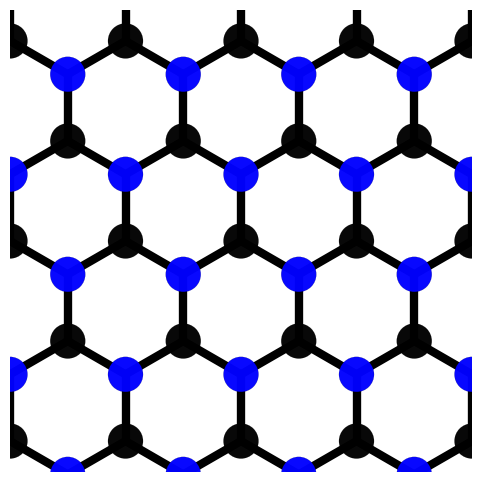

In [39]:
plt.figure(figsize=(6, 6))
graphene_model = pb.Model(
    graphene_lattice,
    pb.translational_symmetry()
)
graphene_model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

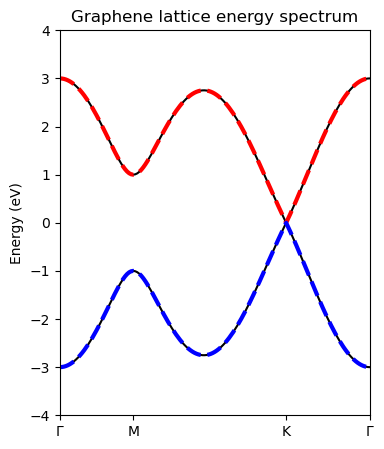

In [50]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(graphene_model)
G1, G2 = graphene_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(Gamma, M, K, Gamma)
graphene_energies = bands.energy
k_path = bands.k_path
plt.plot(graphene_energies, color="black")

phase1 = einsum("ij, j->i", np.array(k_path), [0, a_0]) 
phase2 = einsum("ij, j->i", np.array(k_path), [a_0*sqrt(3)/2, -a_0/2]) 
phase3 = einsum("ij, j->i", np.array(k_path), [-a_0*sqrt(3)/2, -a_0/2]) 
analytic_graphene_energies = exp(phase1 * 1j) + exp(phase2 * 1j) + exp(phase3 * 1j)
plt.plot(np.abs(analytic_graphene_energies), color="red", linestyle="dashed", linewidth=3)
plt.plot(-np.abs(analytic_graphene_energies), color="blue", linestyle="dashed", linewidth=3)

plt.xticks(k_path.point_indices, [r'$\Gamma$', 'M', 'K', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-4, 4)
plt.yticks(np.linspace(-4, 4, num=9));
plt.title("Graphene lattice energy spectrum");
plt.ylabel("Energy (eV)");

# Kagome lattice

In [72]:
a = 1 #lattice constant
# onsite energies
Ea = 0
Eb = 0
Ec = 0 

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
kagome_lattice = pb.Lattice(a1=a1, a2=a2)
kagome_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([a/2, 0]), Eb), ('C', np.array([-a/4, a*sqrt(3)/4]), Ec))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

kagome_lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([0, 0], 'A', 'C', t),
    ([0, -1], 'A', 'C', t),
    ([-1, 0], 'A', 'B', t),
    ([1, 0], 'B', 'C', t),
    ([0, -1], 'B', 'C', t),
)

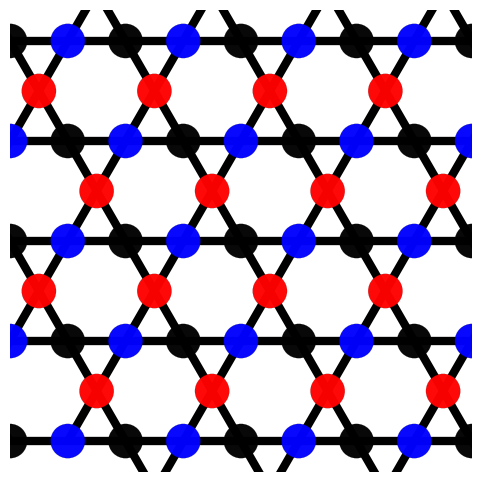

In [73]:
plt.figure(figsize=(6, 6))
kagome_model = pb.Model(
    kagome_lattice,
    pb.translational_symmetry()
)
kagome_model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

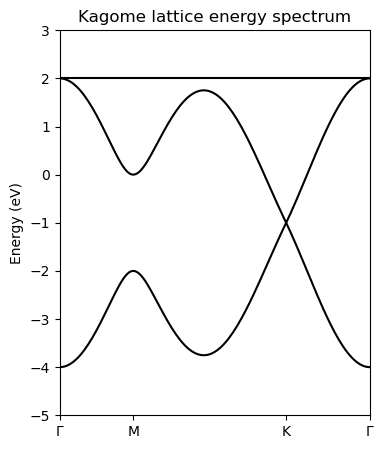

In [80]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(kagome_model)
G1, G2 = kagome_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(Gamma, M, K, Gamma)
kagome_energies = bands.energy
k_path = bands.k_path
plt.plot(kagome_energies, color="black");
plt.xticks(k_path.point_indices, [r'$\Gamma$', 'M', 'K', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-4, 2)
plt.yticks(np.linspace(-5, 3, num=9));
plt.title("Kagome lattice energy spectrum");
plt.ylabel("Energy (eV)");

## AA bilayer graphene

In [109]:
a = 1 #lattice constant
a_0 = a/sqrt(3) # nearest neighbor distance
# onsite energies
Ea = 0
Eb = 0

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
graphene_lattice_aa = pb.Lattice(a1=a1, a2=a2)
graphene_lattice_aa.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([0, a_0]), Eb), ('Ap', np.array([0, 0, a/2]), Ea), ('Bp', np.array([0, a_0, a/2]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1
tprime = -0.1

graphene_lattice_aa.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, -1], 'A', 'B', t),
    ([0, -1], 'A', 'B', t),
    ([0, 0], 'Ap', 'Bp', t),
    ([-1, -1], 'Ap', 'Bp', t),
    ([0, -1], 'Ap', 'Bp', t),
    ([0, 0], 'Ap', 'A', tprime),
    ([0, 0], 'Bp', 'B', tprime),
)

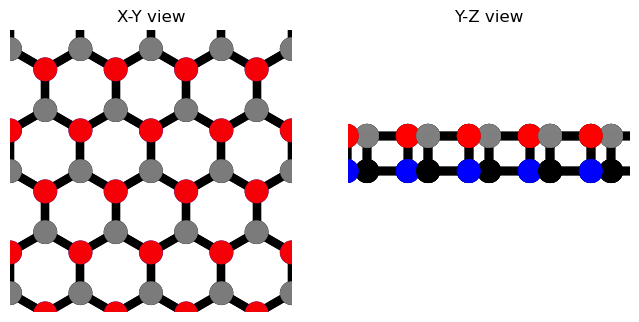

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
graphene_model_aa = pb.Model(
    graphene_lattice_aa,
    pb.translational_symmetry()
)
plt.sca(ax1)
plt.title("X-Y view")
graphene_model_aa.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "grey", "red"], "blend" : 1 }, axes="xy")
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

plt.sca(ax2)
plt.title("Y-Z view")
graphene_model_aa.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "grey", "red"], "blend" : 1 }, axes="yz")
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

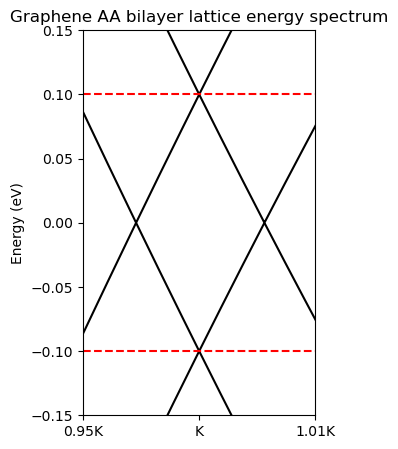

In [143]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(graphene_model_aa)
G1, G2 = graphene_lattice_aa.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(0.95*K, K, 1.05*K, step=0.001 )
graphene_energies_aa = bands.energy
k_path = bands.k_path
plt.plot(graphene_energies_aa, color="black")

plt.xticks(k_path.point_indices, ['0.95K', 'K', '1.01K'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-0.15, 0.15)
plt.hlines([tprime, -tprime], 0, k_path.point_indices[-1], linestyle="dashed", color="red")
#plt.yticks(np.linspace(-1, 1, num=2));
plt.title("Graphene AA bilayer lattice energy spectrum");
plt.ylabel("Energy (eV)");

In [148]:
dos_energies = np.linspace(3*tprime, -3*tprime, 100)
dos = np.zeros(100)

In [161]:
N = 1000
for k1 in range(0, N):
    for k2 in range(0, N):
        solver.set_wave_vector(G1 * k1/N + G2 * k2/N)
        dos += solver.calc_dos(dos_energies, abs(tprime)/5).data

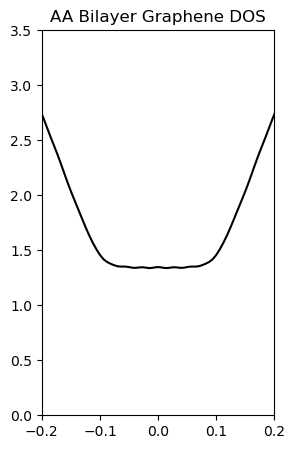

In [194]:
plt.figure(figsize=(3, 5))
plt.title("AA Bilayer Graphene DOS")
plt.plot(dos_energies, sqrt(3)* dos / abs(tprime) / N**2, color="black")
plt.xlim(-0.2, 0.2)
plt.ylim(0, 3.5);
#plt.ylim(1.2, 1.4)

The above should hopefully be the same as Figure 1 in:

Roldán, Rafael, and Luis Brey. "Dielectric screening and plasmons in AA-stacked bilayer graphene." Physical Review B—Condensed Matter and Materials Physics 88.11 (2013): 115420.